In [35]:
# Importing all the essential Python libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [36]:
# Importing Stock market data from the Internet

#from pandas.io.data import DataReader

In [37]:
# Importing datetime for setting start and end date of the stock market dataset

#from datetime import datetime

In [38]:
# Setting the Start and End date for Stock Market Analysis

'''end = datetime.now()
start = datetime(end.year-1,end.month,end.day)'''

'end = datetime.now()\nstart = datetime(end.year-1,end.month,end.day)'

In [39]:
# Importing Apple Stock Prices

AAPL = pd.read_csv('AAPL.csv')

In [40]:
# Some Basic info about the Apple Stock

AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-13,147.809998,153.139999,147.699997,150.470001,149.671112,84457100
1,2023-03-14,151.279999,153.399994,150.100006,152.589996,151.779846,73695900
2,2023-03-15,151.190002,153.250000,149.919998,152.990005,152.177734,77167900
3,2023-03-16,152.160004,156.460007,151.639999,155.850006,155.022537,76161100
4,2023-03-17,156.080002,156.740005,154.279999,155.000000,154.177048,98944600
...,...,...,...,...,...,...,...
247,2024-03-06,171.059998,171.240005,168.679993,169.119995,169.119995,68587700
248,2024-03-07,169.149994,170.729996,168.490005,169.000000,169.000000,71765100
249,2024-03-08,169.000000,173.699997,168.940002,170.729996,170.729996,76114600
250,2024-03-11,172.940002,174.380005,172.050003,172.750000,172.750000,60139500


<Axes: >

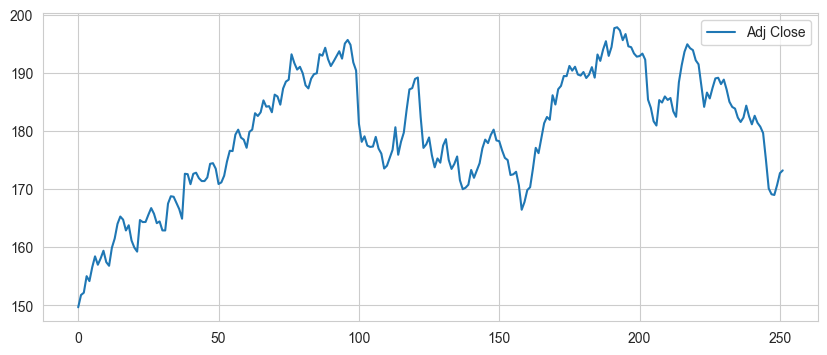

In [41]:
# Plotting Adjusted Closing price for Apple Stock

AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<Axes: >

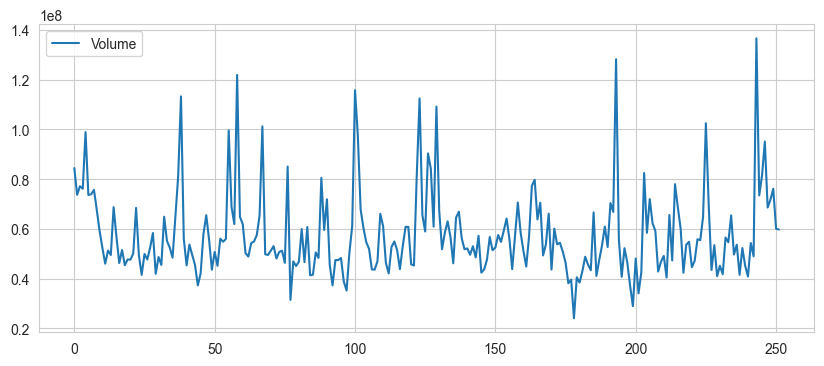

In [42]:
# Plotting the total volume of stock being traded each day

AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [43]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" % ma
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()


<Axes: >

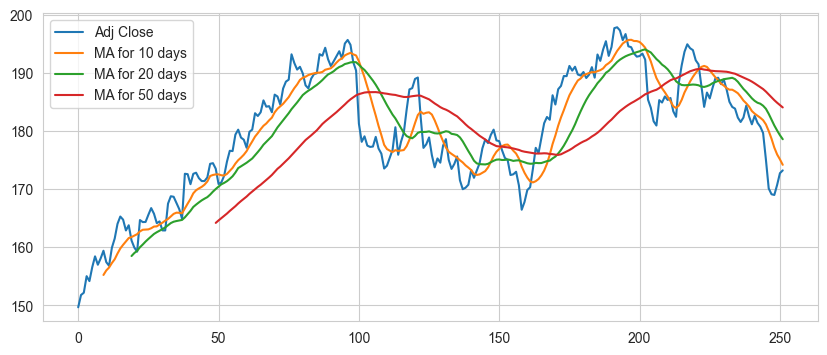

In [44]:
# Plotting the moving averages

AAPL[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<Axes: >

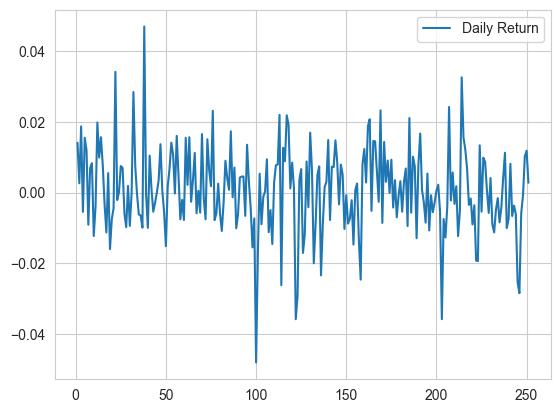

In [45]:
# Plotting Daily returns as a function of Percent change in Adjusted Close value

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6404\2928551292.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(),bins=100)
c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Daily Return', ylabel='Density'>

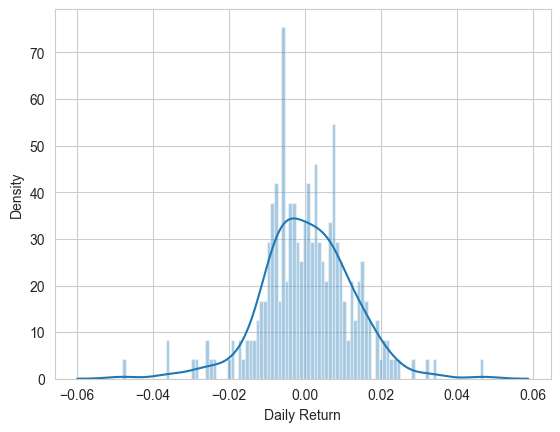

In [46]:
# Plotting the average daily returns of the stock

sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

Text(0, 0.5, 'Risk')

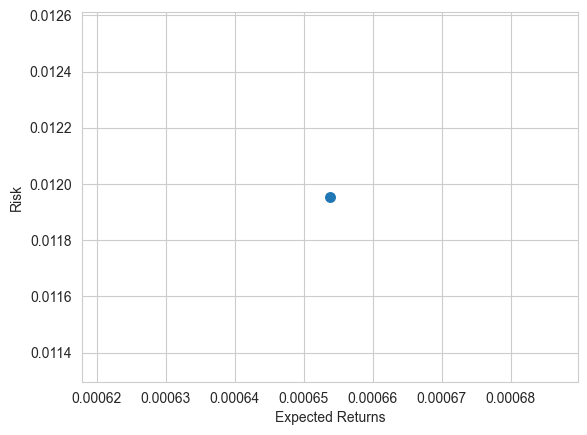

In [47]:
# Risk Analysis --  Comparing the Risk vs Expected returns

rets = AAPL['Daily Return'].dropna()

area = np.pi*15

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6404\2473369249.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(),bins=100)
c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Daily Return', ylabel='Density'>

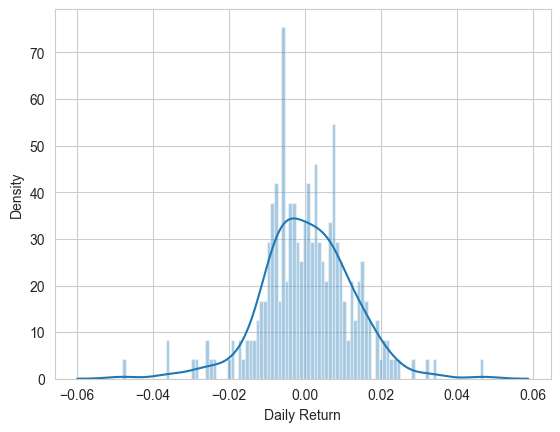

In [48]:
# Visualizing the Value at Risk

sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

In [49]:
# Using Quantiles and the Bootstrap Method to calculate the numerical risk of the stock

AAPL['Daily Return'].quantile(0.05)

-0.017157237269309067

In [50]:
## Monte Carlo Simulation

days = 365

dt = 1/days

mu = rets.mean()

sigma = rets.std()

In [51]:
# Defining the Monte Carlo Simulation Function

def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

In [52]:
AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
0,2023-03-13,147.809998,153.139999,147.699997,150.470001,149.671112,84457100,NaN,NaN,NaN,NaN
1,2023-03-14,151.279999,153.399994,150.100006,152.589996,151.779846,73695900,NaN,NaN,NaN,0.014089
2,2023-03-15,151.190002,153.250000,149.919998,152.990005,152.177734,77167900,NaN,NaN,NaN,0.002621
3,2023-03-16,152.160004,156.460007,151.639999,155.850006,155.022537,76161100,NaN,NaN,NaN,0.018694
4,2023-03-17,156.080002,156.740005,154.279999,155.000000,154.177048,98944600,NaN,NaN,NaN,-0.005454


Text(0.5, 1.0, 'Monte Carlo Simulation for Apple')

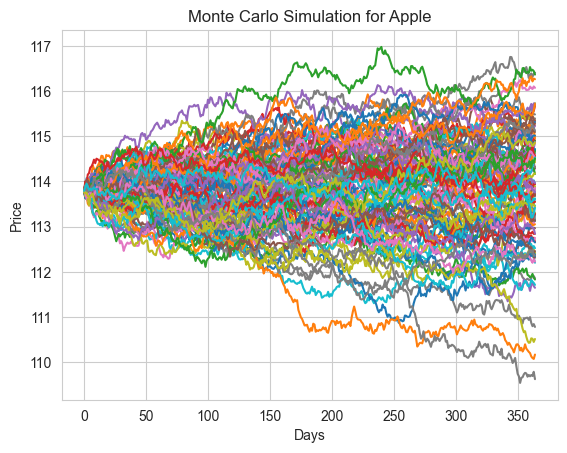

In [53]:
# Running the Monte Carlo simulation a hundred times

start_price = 113.790001

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation for Apple')

In [54]:
# Analysing the Monte Carlo Simulation for 10,000 simulations

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
# 1 percent impirical quantile or 99% Confidence Interval

q = np.percentile(simulations,1)

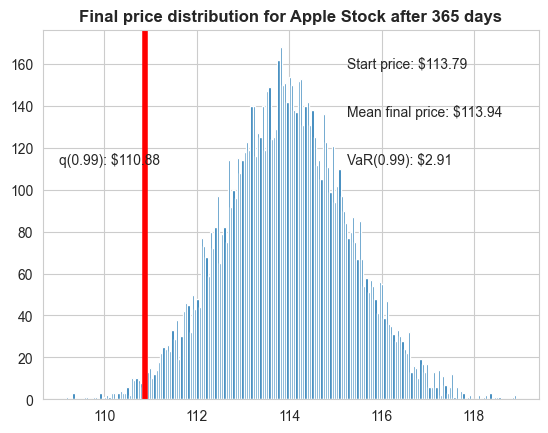

In [55]:
# Plotting the final Risk Analysis plot using Monte Carlo Simulation

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Apple Stock after %s days" % days, weight='bold');